In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
### Script to calculate windroses ###
#Follow this procedure to update the insitu data (Example: Emilia Romagna in /work/cmcc/vr25423/Project/AdriaClimPlus/data/insitu/REGIONI_IN_SITU_OBS/)
'''
cd /work/cmcc/vr25423/Project/AdriaClimPlus/data/insitu/REGIONI_IN_SITU_OBS

In raw_data/EMILIA_ROMAGNA/DATA_STATIONS_EMILIA_ROMAGNA_1989_2017_REF_03_12_2024/final_station_summary.csv, check the station name and staiton id.
6030,Piacenza urbana,URBANE,9.679647000000001,45.054924  -> 6030 is the station id

grep -ir ",6030," raw_data/EMILIA_ROMAGNA/DATA_STATIONS_EMILIA_ROMAGNA_1989_2017_REF_03_12_2024/urbane_wind_vel_hourly.txt >&PIACENZA_wind_vel_hourly.txt&
grep -ir ",6030," raw_data/EMILIA_ROMAGNA/wind_dir_10min_EMILIA_ROMAGNA_1987_2023_REF_14_02_2025/urbane_wind_dir_10min.txt >&PIACENZA_wind_dir_10min.txt&

mv PIACENZA_wind_vel_hourly.txt processed/EMILIA_ROMAGNA
mv PIACENZA_wind_dir_10min.txt processed/EMILIA_ROMAGNA

# Use this script to update the data with missing values=-99999 from 1990 to 2020
/users_home/cmcc/vr25423/scripts/WRF_Evaluation/missing_data.ipynb
'''

'\ncd /work/cmcc/vr25423/Project/AdriaClimPlus/data/insitu/REGIONI_IN_SITU_OBS\n\nIn raw_data/EMILIA_ROMAGNA/DATA_STATIONS_EMILIA_ROMAGNA_1989_2017_REF_03_12_2024/final_station_summary.csv, check the station name and staiton id.\n6030,Piacenza urbana,URBANE,9.679647000000001,45.054924  -> 6030 is the station id\n\ngrep -ir ",6030," raw_data/EMILIA_ROMAGNA/DATA_STATIONS_EMILIA_ROMAGNA_1989_2017_REF_03_12_2024/urbane_wind_vel_hourly.txt >&PIACENZA_wind_vel_hourly.txt&\ngrep -ir ",6030," raw_data/EMILIA_ROMAGNA/wind_dir_10min_EMILIA_ROMAGNA_1987_2023_REF_14_02_2025/urbane_wind_dir_10min.txt >&PIACENZA_wind_dir_10min.txt&\n\nmv PIACENZA_wind_vel_hourly.txt processed/EMILIA_ROMAGNA\nmv PIACENZA_wind_dir_10min.txt processed/EMILIA_ROMAGNA\n\n# Use this script to update the data with missing values=-99999 from 1990 to 2020\n/users_home/cmcc/vr25423/scripts/WRF_Evaluation/missing_data.ipynb\n'

In [3]:
'''
station_EMILIA_ROMAGNA_Ravenna.txt
station_EMILIA_ROMAGNA_Ravenna.txt
station_EMILIA_ROMAGNA_Ravenna.txt
station_EMILIA_ROMAGNA_Ravenna.txt
station_EMILIA_ROMAGNA_Ravenna.txt
station_EMILIA_ROMAGNA_PIACENZA.txt
station_EMILIA_ROMAGNA_Ravenna.txt
station_EMILIA_ROMAGNA_Ravenna.txt
'''

'\nstation_EMILIA_ROMAGNA_Ravenna.txt\nstation_EMILIA_ROMAGNA_Ravenna.txt\nstation_EMILIA_ROMAGNA_Ravenna.txt\nstation_EMILIA_ROMAGNA_Ravenna.txt\nstation_EMILIA_ROMAGNA_Ravenna.txt\nstation_EMILIA_ROMAGNA_PIACENZA.txt\nstation_EMILIA_ROMAGNA_Ravenna.txt\nstation_EMILIA_ROMAGNA_Ravenna.txt\n'

In [4]:

#In this path /work/cmcc/vr25423/Project/AdriaClimPlus/data/insitu/REGIONI_IN_SITU_OBS/LOCALI, grep only the required station data.
# The raw station data is in the following location: /work/cmcc/vr25423/Project/AdriaClimPlus/data/insitu/REGIONI_IN_SITU_OBS/raw_data/DATA_STATIONS_EMILIA_ROMAGNA_1989_2017_REF_03_12_2024
# Use this script to update the data with missing values=-99999 from 1990 to 2020 in /users_home/cmcc/vr25423/scripts/WRF_Evaluation/missing_data.ipynb
############################################
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from windrose import WindroseAxes
from windrose import plot_windrose
import matplotlib.cm as cm
import os
#from metpy.calc import wind_direction
#import geopy.distance
#from shapely.geometry import Point, MultiPoint
#from shapely.ops import nearest_points
############################################

In [5]:
name_exp = "EMILIA_ROMAGNA_Ravenna"

base_path_insitu = '/work/cmcc/vr25423/Project/AdriaClimPlus/data/insitu/REGIONI_IN_SITU_OBS/processed/EMILIA_ROMAGNA'
base_path_wrf = '/work/cmcc/vr25423/Project/AdriaClimPlus/evaluation_run_30yrs_ERA5/WRF-WRF-Hydro/1990_2020/pp'
path_list_stations = base_path_insitu+"/station_EMILIA_ROMAGNA_Ravenna.txt"

In [6]:
town_name=np.loadtxt(path_list_stations, usecols=0, dtype='str')
lat_town=np.loadtxt(path_list_stations, usecols=2, dtype='float')
lon_town=np.loadtxt(path_list_stations, usecols=3, dtype='float')
freq_town=np.loadtxt(path_list_stations, usecols=4, dtype='str')

print (town_name)
print (lat_town)
print (lon_town)
print (freq_town)

print ('Working on station ', town_name)
print ('LATITUDE station: ', lat_town)
print ('LONGITUDE station: ', lon_town)
print ('Frequency for this station: ', freq_town)


Ravenna_URBANA
44.414999
12.200032
1h
Working on station  Ravenna_URBANA
LATITUDE station:  44.414999
LONGITUDE station:  12.200032
Frequency for this station:  1h


In [7]:
# preparing vectors that will contain obs data 
wind_dir_station = []
wind_module_station = []

#-- import the files with obs wind speed/direction data 
path_wind_dir_station = base_path_insitu+"/Ravenna_wind_dir_hourly_Filled.txt"
path_wind_module_station = base_path_insitu+"/Ravenna_wind_vel_hourly_Filled.txt"

wind_dir_station = np.loadtxt(path_wind_dir_station, usecols=0, dtype='float')
wind_module_station = np.loadtxt(path_wind_module_station, usecols=0, dtype='float')

wind_dir_station [wind_dir_station == -99999.00] = np.nan
wind_module_station [wind_module_station == -99999.00] = np.nan

np.set_printoptions(threshold=np.inf)

print ('Number of data available: ', np.count_nonzero(~np.isnan(wind_dir_station)))
print ('')


Number of data available:  118785



In [8]:
# select just the data for which we have WRF+WRFHYDRO values (00:00, 06:00, 12:00, 18:00) 
data_station_direction = []
data_station_module = []
if (freq_town == '30min'):
    print ('This station has values every 30 mins')
    for counter in range (0,len(wind_dir_station), 12):
        data_station_direction.append (wind_dir_station[counter])
        data_station_module.append (wind_module_station[counter])
elif (freq_town == '1h'):
    print ('This station has values every 1 hour')
    for counter in range (0,len(wind_dir_station), 6):
        data_station_direction.append (wind_dir_station[counter])
        data_station_module.append (wind_module_station[counter])
elif (freq_town == '15min'):
    print ('This station has values every 15 mins')
    for counter in range (0,len(wind_dir_station), 24):
        data_station_direction.append (wind_dir_station[counter])
        data_station_module.append (wind_module_station[counter])

This station has values every 1 hour


In [9]:
# UPLOADING WRF+WRF_HYDRO
path_wrf_wrfhydro_vn = base_path_wrf+'/vn.nc'
path_wrf_wrfhydro_vdir = base_path_wrf+'/vdir.nc'

#-- read the file
ds_wrf_vn = nc.Dataset(path_wrf_wrfhydro_vn, 'r')
ds_wrf_vdir = nc.Dataset(path_wrf_wrfhydro_vdir, 'r')
#-- read the variables from the files
lat_wrf_extr = ds_wrf_vn.variables['XLAT'][:,:]
lon_wrf_extr = ds_wrf_vn.variables['XLONG'][:,:]
lat_wrf_1D = ds_wrf_vn.variables['XLAT'][:,0]
lon_wrf_1D = ds_wrf_vn.variables['XLONG'][0,:]

In [10]:
# find nearest point in WRF and ERA5land array
lat_wrf = lat_wrf_extr.flatten()
lon_wrf = lon_wrf_extr.flatten()

distances_wrf = (lat_wrf-lat_town)**2 + (lon_wrf-lon_town)**2
idx_wrf = np.argmin (distances_wrf)

print ('Latitude for WRF: ', lat_wrf[idx_wrf])
print ('Longitude for WRF: ', lon_wrf[idx_wrf])

index_lat_wrf = np.array (np.where (lat_wrf_1D == lat_wrf[idx_wrf]))[0]
index_lon_wrf = np.array (np.where (lon_wrf_1D == lon_wrf[idx_wrf]))[0]

Latitude for WRF:  44.405624
Longitude for WRF:  12.197876


In [11]:
# extract wind speed module and components for WRF
wind_module_wrf_at_station = np.array(ds_wrf_vn.variables['vn'][:,index_lat_wrf,index_lon_wrf].ravel())
wind_direction_wrf_at_station = np.degrees(ds_wrf_vdir.variables['vdir'][:,index_lat_wrf,index_lon_wrf].ravel())

In [12]:
### Making the number usable observations same for both wind speed and direction.
data_station_direction = np.where(np.isnan(data_station_module), np.nan, data_station_direction)
data_station_module = np.where(np.isnan(data_station_direction), np.nan, data_station_module)

In [13]:
# Making number of observations and simulated data same
wind_module_wrf_at_station_m = np.where(np.isnan(data_station_module), np.nan, wind_module_wrf_at_station)
wind_direction_wrf_at_station_m = np.where(np.isnan(data_station_direction), np.nan, wind_direction_wrf_at_station)

In [26]:
#converting wrf wind direction between -180 and 180 to 0 and 360 degrees.
wind_direction_wrf_at_station_m_0to360 = wind_direction_wrf_at_station_m + 180

In [27]:
data_station_direction = data_station_direction[~np.isnan(data_station_direction)]
data_station_module = data_station_module[~np.isnan(data_station_module)]

In [28]:
wind_direction_wrf_at_station_m_0to360 = wind_direction_wrf_at_station_m_0to360[~np.isnan(wind_direction_wrf_at_station_m_0to360)]
wind_module_wrf_at_station_m = wind_module_wrf_at_station_m[~np.isnan(wind_module_wrf_at_station_m)]

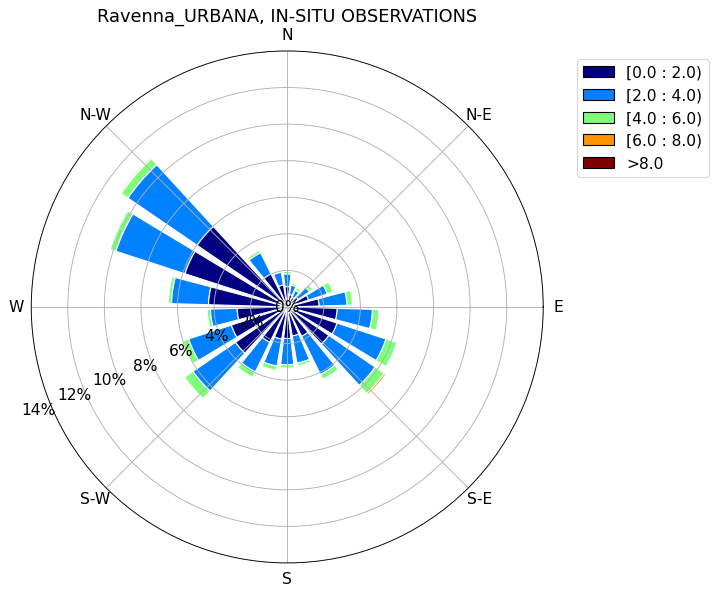

In [29]:
### Plot insitu ###
ax = WindroseAxes.from_ax()
windrose_plot = ax.bar (data_station_direction, data_station_module, normed=True, opening=0.8, nsector=22, bins=np.arange(0,10,2), cmap=cm.jet, edgecolor="white")

#ax.set_legend(title_fontsize=14, fontsize=14, loc="upper left", bbox_to_anchor=(1.05, 1))

ax.legend(fontsize=14, loc="upper left", bbox_to_anchor=(1.05, 1))

r = np.arange(0, 16, 2)
ax.tick_params(axis="x", labelsize=14)
ax.set_yticks(r)

rrr = []
#for el in r:
#    rrr.append("{NUM}%".format(NUM=el))
#ax.set_yticklabels(rrr, fontsize=14)
plt.title(str(town_name)+', WRF', fontsize=16)

for i, r_value in enumerate(r):
    ax.text(4.5*np.pi/4, r_value * 1.05, f"{r_value}%", horizontalalignment='center', verticalalignment='center', fontsize=14, color='black')

plt.title(str(town_name)+', IN-SITU OBSERVATIONS', fontsize=16)
plt.show()

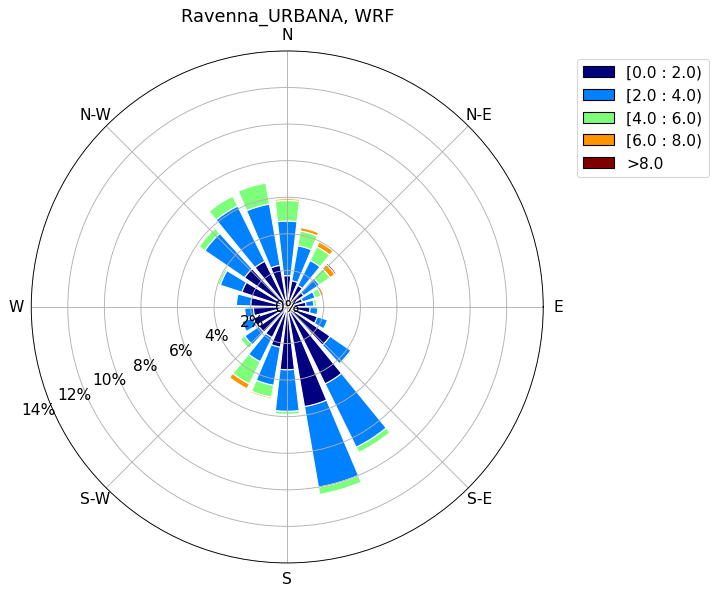

In [30]:
### Plot WRF ###
ax = WindroseAxes.from_ax()
windrose_plot = ax.bar (wind_direction_wrf_at_station_m_0to360, wind_module_wrf_at_station_m, normed=True, opening=0.8, nsector=22, bins=np.arange(0,10,2), cmap=cm.jet, edgecolor="white")

#ax.set_legend(title_fontsize=14, fontsize=14, loc="upper left", bbox_to_anchor=(1.05, 1))

ax.legend(fontsize=14, loc="upper left", bbox_to_anchor=(1.05, 1))

r = np.arange(0, 16, 2)
ax.tick_params(axis="x", labelsize=14)
ax.set_yticks(r)

rrr = []
#for el in r:
#    rrr.append("{NUM}%".format(NUM=el))
#ax.set_yticklabels(rrr, fontsize=14)
plt.title(str(town_name)+', WRF', fontsize=16)

for i, r_value in enumerate(r):
    ax.text(4.5*np.pi/4, r_value * 1.05, f"{r_value}%", horizontalalignment='center', verticalalignment='center', fontsize=14, color='black')

plt.show()

In [ ]:
wind_direction_wrf_at_station_m_0to360 = wind_direction_wrf_at_station_m + 180

In [19]:
np.unique(wind_direction_wrf_at_station_m)

array([-1.79995331e+02, -1.79978745e+02, -1.79975174e+02, -1.79964035e+02,
       -1.79949936e+02, -1.79943466e+02, -1.79920776e+02, -1.79897629e+02,
       -1.79887543e+02, -1.79877258e+02, -1.79832703e+02, -1.79819229e+02,
       -1.79808594e+02, -1.79803024e+02, -1.79785599e+02, -1.79781067e+02,
       -1.79707672e+02, -1.79655716e+02, -1.79646286e+02, -1.79644562e+02,
       -1.79619186e+02, -1.79596451e+02, -1.79557632e+02, -1.79552536e+02,
       -1.79518356e+02, -1.79504868e+02, -1.79452286e+02, -1.79430969e+02,
       -1.79430023e+02, -1.79414246e+02, -1.79400848e+02, -1.79388855e+02,
       -1.79385056e+02, -1.79343781e+02, -1.79327972e+02, -1.79320206e+02,
       -1.79303192e+02, -1.79290207e+02, -1.79244904e+02, -1.79239960e+02,
       -1.79232391e+02, -1.79212463e+02, -1.79180435e+02, -1.79178207e+02,
       -1.79177826e+02, -1.79167053e+02, -1.79137650e+02, -1.79117050e+02,
       -1.79111160e+02, -1.79089691e+02, -1.79039841e+02, -1.79000504e+02,
       -1.78995865e+02, -

In [20]:
np.unique(wind_direction_wrf_at_station_m_0to360)

array([4.66918945e-03, 2.12554932e-02, 2.48260498e-02, 3.59649658e-02,
       5.00640869e-02, 5.65338135e-02, 7.92236328e-02, 1.02371216e-01,
       1.12457275e-01, 1.22741699e-01, 1.67297363e-01, 1.80770874e-01,
       1.91406250e-01, 1.96975708e-01, 2.14401245e-01, 2.18933105e-01,
       2.92327881e-01, 3.44284058e-01, 3.53713989e-01, 3.55438232e-01,
       3.80813599e-01, 4.03549194e-01, 4.42367554e-01, 4.47463989e-01,
       4.81643677e-01, 4.95132446e-01, 5.47714233e-01, 5.69030762e-01,
       5.69976807e-01, 5.85754395e-01, 5.99151611e-01, 6.11145020e-01,
       6.14944458e-01, 6.56219482e-01, 6.72027588e-01, 6.79794312e-01,
       6.96807861e-01, 7.09793091e-01, 7.55096436e-01, 7.60040283e-01,
       7.67608643e-01, 7.87536621e-01, 8.19564819e-01, 8.21792603e-01,
       8.22174072e-01, 8.32946777e-01, 8.62350464e-01, 8.82949829e-01,
       8.88839722e-01, 9.10308838e-01, 9.60159302e-01, 9.99496460e-01,
       1.00413513e+00, 1.00532532e+00, 1.01544189e+00, 1.01789856e+00,
      

In [ ]:
### Extras #####

In [ ]:
wind_speed_wrf_extr = ds_wrf_vn.variables['vn'][:,:,:]

In [ ]:
wind_direction_wrf_extr = ds_wrf_vdir.variables['vdir'][:,:,:]

In [ ]:
# UPLOADING ERA5LAND DATA

path_era5land = base_path+'/DATA_WIND_HOURLY_ERA5LAND/ERA5-LAND_2019_2023_hourly_wind_data.nc'
ds_era5land = nc.Dataset(path_era5land, 'r')


In [7]:
len(data_station_direction)

44982